# DS 542 Project 4

Your task for this project is to build a generative model for cute animal pictures based on a provided data set.
You may use any of the generative modeling types discussed in class so far (GANs, VAEs, and diffusion models), but you are encouraged to try implement diffusion models.
Links to sample code for diffusion models are below.

Your output should be 64x64 color PNG files.
Your output will be graded based on the following criteria.

1. Standard metrics for generative image model quality - Inception score and Fréchet Inception Distance.
2. Diversity of generated classes.
3. Manual assessment of output quality.

Further details are at the end of this notebook.

## Data Set

The data set for this project is a new synthetic data set created using Stable Diffusion 3 Medium.

The data set is composed of 22,000 images.
There are 11 classes of images with 2,000 images for each class.
* cat
* chicken
* dog
* dragon
* fish
* frog
* gecko
* hamster
* horse
* monkey
* rabbit

The data set is available on GitHub at https://github.com/DL4DS/synth-cute and on the SCC at `/projectnb/ds542/materials/synth-cute`.

Each image is stored in a PNG file with a matching JSON file with metadata.
You do not need to use the JSON files, but they might be helpful if you are curious about the data set.
The images were generated at 512x512 resolution, but you should generate images at 64x64 resolution.
The data set loading code provided will automatically resize the images to 64x64 resolution.

![](https://github.com/DL4DS/synth-cute/blob/main/00/00048500e02c4dcaebc7374045bfd6f7dc4979bea75b05e837e5be5a06cb3381.png?raw=true)

### Data Set Loading Code

In [1]:
# UNCOMMENT AND ADJUST data_path BELOW IF NOT ON SCC
# !git clone https://github.com/dl4ds/synth-cute

In [2]:
IMAGE_SIZE=64

In [3]:
import dataclasses
import os
import pathlib
import sys

In [4]:
# automatically add location of class packages if running on the SCC

scc_site_packages = "/projectnb/ds542/materials/lib/python3.12/site-packages"
if os.path.isdir(scc_site_packages) and scc_site_packages not in sys.path:
    sys.path.append(scc_site_packages)


In [5]:
import PIL
import accelerate
import diffusers
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import skimage
import torch
import tqdm

In [6]:
data_path = pathlib.Path('/projectnb/ds542/materials/synth-cute')

In [7]:
DEVICE="cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [8]:
class CuteDataSet(torch.utils.data.Dataset):
    def __init__(self, input_dirname, image_size=64):
        input_path = pathlib.Path(input_dirname)
        self.input_image_paths = list(input_path.glob("*/*.png"))
        # OPTIONAL: test on smaller set of images.
        # recommended while developing but not training.
        # self.input_image_paths = self.input_image_paths[:100]

        self.image_size = image_size

    def __len__(self):
        return len(self.input_image_paths)

    def __getitem__(self, idx):
        input_path = self.input_image_paths[idx]

        image = imageio.imread(input_path)
        image = image.astype(float)
        image = image / 255.0
        image = skimage.transform.resize(image, (self.image_size, self.image_size))
        image = image.transpose((2, 0, 1))
        image = torch.tensor(image, dtype=torch.float32, device=DEVICE)
        return image

dataset = CuteDataSet(data_path, image_size=IMAGE_SIZE)
print(len(dataset))

first_image = dataset[0]
(first_image.shape, first_image.dtype, first_image.device)

22000


(torch.Size([3, 64, 64]), torch.float32, device(type='cuda', index=0))

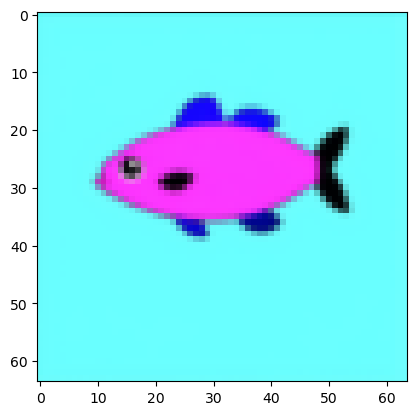

In [9]:
# this function wraps matplotlib.pyplot.imshow to automatically convert the Torch tensors
# into the necessary format.

def imshow(image):
    image = image.cpu()
    image = image.clamp(0, 1)
    image = image.numpy()
    image = image.transpose((1, 2, 0))
    plt.imshow(image)

imshow(first_image)

## Recommended Sample Code

The difficulty of this project was vetted using the diffusers library from Hugging Face.
Specifically, their "Train a diffusion model" tutorial was followed.

https://huggingface.co/docs/diffusers/main/en/tutorials/basic_training

You do not need to work with this library or use this sample code, but **you are strongly encouraged to try it out early, or give yourself time to fallback to this sample code** if you have difficulty trying another path.


### Sample Code on the Shared Compute Cluster

If you adapt the recommended sample code to the specified 64x64 resolution and request 4 CPUs, 1 GPU and version 8, then 1 epoch will take approximately 8 minutes.
Based on the samples from the sample code below, you will need more than 60 epochs which is already about 8 hours.

It will probably be helpful to keep multiple model snapshots and submit batch training jobs to the SCC.
(Example qsub code will be posted soon.)

#### Sample Code Samples after 10 Epochs

![Sample images after 10 epochs](https://github.com/DL4DS/fa2025/blob/main/static_files/assignments/project4-diffusers-10-epochs.png?raw=true)

#### Sample Code Samples after 20 Epochs

![Sample images after 20 epochs](https://github.com/DL4DS/fa2025/blob/main/static_files/assignments/project4-diffusers-20-epochs.png?raw=true)

#### Sample Code Samples after 30 Epochs

![Sample images after 30 epochs](https://github.com/DL4DS/fa2025/blob/main/static_files/assignments/project4-diffusers-30-epochs.png?raw=true)

#### Sample Code Samples after 40 Epochs

![Sample images after 40 epochs](https://github.com/DL4DS/fa2025/blob/main/static_files/assignments/project4-diffusers-40-epochs.png?raw=true)

#### Samples after 50 Epochs

![Sample images after 50 epochs](https://github.com/DL4DS/fa2025/blob/main/static_files/assignments/project4-diffusers-50-epochs.png?raw=true)

#### Sample Code Samples after 60 Epochs

![Sample images after 60 epochs](https://github.com/DL4DS/fa2025/blob/main/static_files/assignments/project4-diffusers-60-epochs.png?raw=true)

## Your Implementation

In [117]:
# YOUR CHANGES HERE

...

## Submission

You will submit your notebook and any other files used for training, along with several images to evaluate quality, to Gradescope.


### Evaluation Images based on Fixed Seeds

Generate 100 images using seeds 1-100.
Seeds 1-10 will used for manual grading, and all of these images will be used for the automated metrics.

You are not constrained on the specific seed usage, but your generation should be deterministic once the seed is specified.
If you use the recommended sample code, the generation call has a `generator` parameter to pass in a random number generator.

https://huggingface.co/docs/diffusers/v0.3.0/en/api/pipelines/ddpm#diffusers.DDPMPipeline

In [ ]:
# YOUR CODE HERE

...

Save your images in files named `fixed-001.png` through `fixed-100.png`.
Please make sure to include the zero padding in the file names.

### Evaluation Images of Your Own Choice

Pick 10 of your own favorite output images for manual grading and save them as `favorite-SEED.png`.
You do not need to include zero padding in the file names.

In [ ]:
# YOUR CODE HERE

...

### Saved Model Weights

Save your model weights for submission.
If you are using the sample code, this may be a `.safetensors` file.

### Submission Files

Submit all of the following files in Gradescope.

1. 100x images based on fixed seeds
2. 10x images based on favorite seeds
3. Your Jupyter notebook
4. ~~Your model weights~~ Do not submit your model weights. Instead, save your model weights in your own storage (SCC ok) until after final grades are posted in case any questions come up. They will probably be too big to submit to Gradescope.
5. Any other files that contributed to your final outputs (e.g. batch submission scripts)

## Grading Criteria

1. Generation quality metrics
   * Inception score (30%) and Fréchet Inception Score (30%) will be used with a bespoke classifier trained with the same data set.
   * Thresholds for full credit with each score will be determined later.
3. Class diversity (30%).
   * If each class constitutes at least 5% of the output according to our classifier, you will get full credit.
4. Manual quality assessment.
   * Our chosen seeds (5%)
   * Your choice of best output (5%)